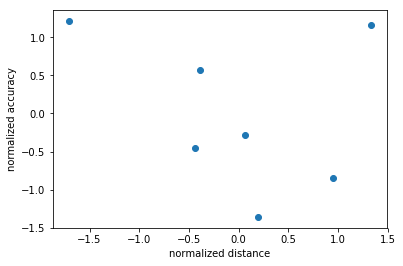

In [2]:
import pandas 
import matplotlib.pyplot as plt

pga=pandas.read_csv(r'C:\Users\Ordinary\Desktop\pga_tour.csv')
#print(pga)
#print(pga.distance)
#print(pga.accuracy)
pga.distance=(pga.distance -pga.distance.mean())/pga.distance.std()
pga.accuracy=(pga.accuracy-pga.accuracy.mean())/pga.accuracy.std()
#print(pga.head())

plt.scatter(pga.distance,pga.accuracy)
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

print("Shape of the series:",pga.distance.shape)
print("Shape with newaxis:",pga.distance[:,np.newaxis].shape)

lm=LinearRegression()
lm.fit(pga.distance[:,np.newaxis],pga.accuracy)
thetal=lm.coef_[0]
print(thetal)

Shape of the series: (7,)
Shape with newaxis: (7, 1)
-0.269410599768


1.08806622837


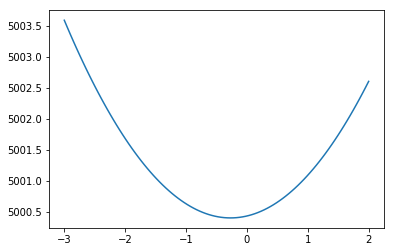

In [4]:
def cost(theta0,thetal,x,y):
    J=0
    m=len(x)
    for i in range(m):
        h=thetal*x[i]+theta0
        J+=(h-y[i])**2
    J/=(2*m)
    return J
print(cost(0,1,pga.distance,pga.accuracy))

theta0=100
thetals=np.linspace(-3,2,100)
#print(thetals)
costs=[]
for thetal in thetals:
    costs.append(cost(theta0,thetal,pga.distance,pga.accuracy))
plt.plot(thetals,costs)
plt.show()

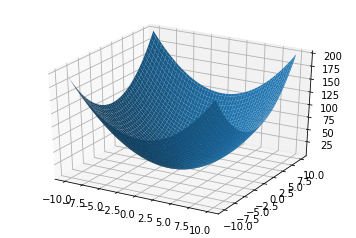

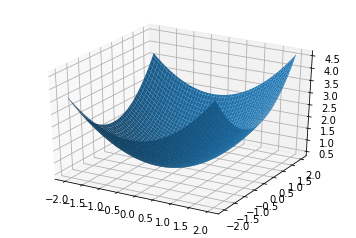

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)

X,Y=np.meshgrid(x,y)
Z=X**2+Y**2

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

theta0s=np.linspace(-2,2,100)
thetals=np.linspace(-2,2,100)
COST=np.empty(shape=(100,100))
TOS,TIS=np.meshgrid(theta0s,thetals)
for i in range(100):
    for j in range(100):
        COST[i,j]=cost(TOS[0,i],TIS[j,0],pga.distance,pga.accuracy)

fig2=plt.figure()
ax=fig2.gca(projection='3d')
ax.plot_surface(X=TOS,Y=TIS,Z=COST)
plt.show()

In [23]:
def partial_cost_theta1(theta0,theta1,x,y):
    h=theta0+theta1*x
    diff=(h-y)*x
    partial =diff.sum()/(x.shape[0])
    return partial
partial1=partial_cost_theta1(0,5,pga.distance,pga.accuracy)
print("partial1=",partial1)
def partial_cost_theta0(theta0,theta1,x,y):
    h=theta0+theta1*x
    diff=(h-y)
    partial =diff.sum()/(x.shape[0])
    return partial
partial0=partial_cost_theta0(1,1,pga.distance,pga.accuracy)

partial1= 4.5166376569442255


Theta1= 0


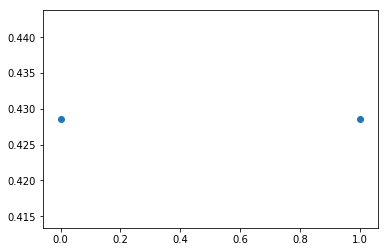

In [25]:
def gradient_descent(x,y,alpha=0.1,theta0=0,theta1=0):
    max_epochs=1000
    counter=0
    c=cost(theta1,theta0,pga.distance,pga.accuracy)
    costs=[c]
    convergence_thres=0.000001
    cprev=c+10
    theta0s=[theta0]
    theta1s=[theta1]
    
    while(np.abs(cprev-c)>convergence_thres)and(counter <max_epochs):
        cprev=c
        update0=alpha*partial_cost_theta0(theta0,theta1,x,y)
        update1=alpha*partial_cost_theta1(theta0,theta1,x,y)
        
        theta0-=theta0
        theta1-=theta1
        
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        c=cost(theta0,theta1,pga.distance,pga.accuracy)
        
        costs.append(c)
        counter+=1
        
        return {'theta0':theta0,'theta1':theta1,"costs":costs}
    
print("Theta1=",gradient_descent(pga.distance,pga.accuracy)['theta1'])
descend=gradient_descent(pga.distance,pga.accuracy,alpha=0.01)
plt.scatter(range(len(descend["costs"])),descend["costs"])
plt.show()